In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the metrics data from the JSON file
metrics_file_path = './metrics/metrics.json'

with open(metrics_file_path, 'r') as file:
    metrics_data = json.load(file)

# Check if the training loss over epochs data is available for each model
metrics_data.keys()  # This will show us the structure of the JSON file

dict_keys(['resnet18', 'resnet34', 'resnet50'])

## Training metrics

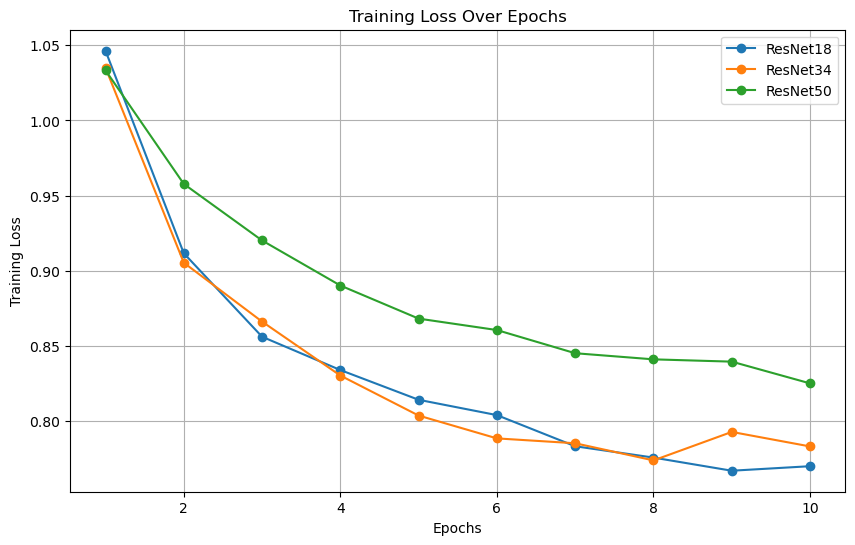

In [4]:
# Extracting training loss data for each model
epochs = list(range(1, len(metrics_data['resnet18']['train_loss']) + 1))  # Assuming same number of epochs for all models
train_loss_resnet18 = metrics_data['resnet18']['train_loss']
train_loss_resnet34 = metrics_data['resnet34']['train_loss']
train_loss_resnet50 = metrics_data['resnet50']['train_loss']

# Creating the plot for Training Loss over Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss_resnet18, label='ResNet18', marker='o')
plt.plot(epochs, train_loss_resnet34, label='ResNet34', marker='o')
plt.plot(epochs, train_loss_resnet50, label='ResNet50', marker='o')

plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

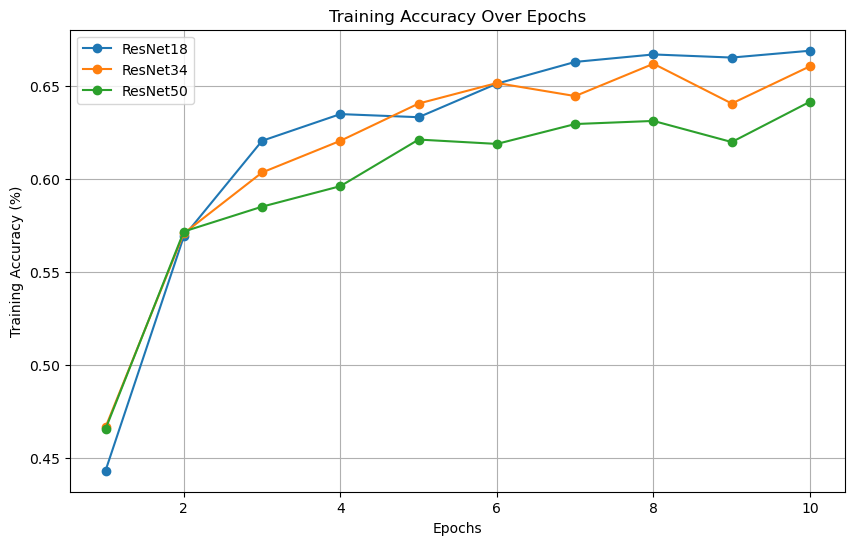

In [5]:
# Extracting training accuracy data for each model
train_accuracy_resnet18 = metrics_data['resnet18']['train_accuracy']
train_accuracy_resnet34 = metrics_data['resnet34']['train_accuracy']
train_accuracy_resnet50 = metrics_data['resnet50']['train_accuracy']

# Creating the plot for Training Accuracy over Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy_resnet18, label='ResNet18', marker='o')
plt.plot(epochs, train_accuracy_resnet34, label='ResNet34', marker='o')
plt.plot(epochs, train_accuracy_resnet50, label='ResNet50', marker='o')

plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

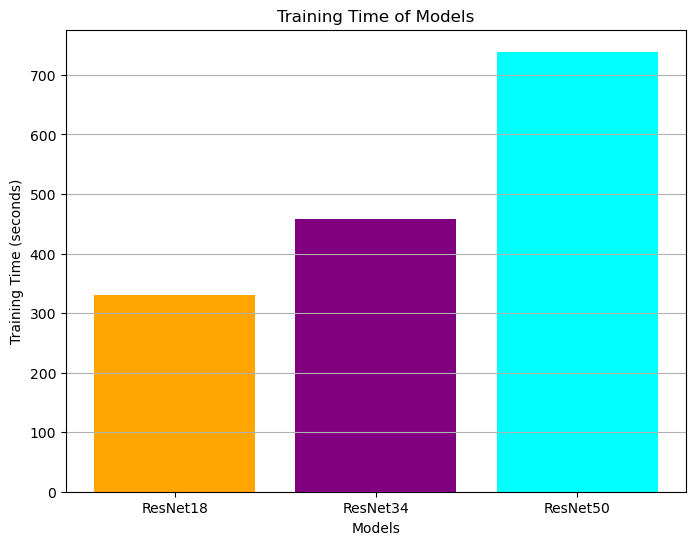

In [6]:
# Extracting training time data for each model
train_time_resnet18 = metrics_data['resnet18']['train_time']
train_time_resnet34 = metrics_data['resnet34']['train_time']
train_time_resnet50 = metrics_data['resnet50']['train_time']

# Data for the bar chart
models = ['ResNet18', 'ResNet34', 'ResNet50']
train_times = [train_time_resnet18, train_time_resnet34, train_time_resnet50]

# Creating the bar chart for Training Time
plt.figure(figsize=(8, 6))
plt.bar(models, train_times, color=['orange', 'purple', 'cyan'])

plt.title('Training Time of Models')
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.grid(axis='y')
plt.show()

## Testing metrics

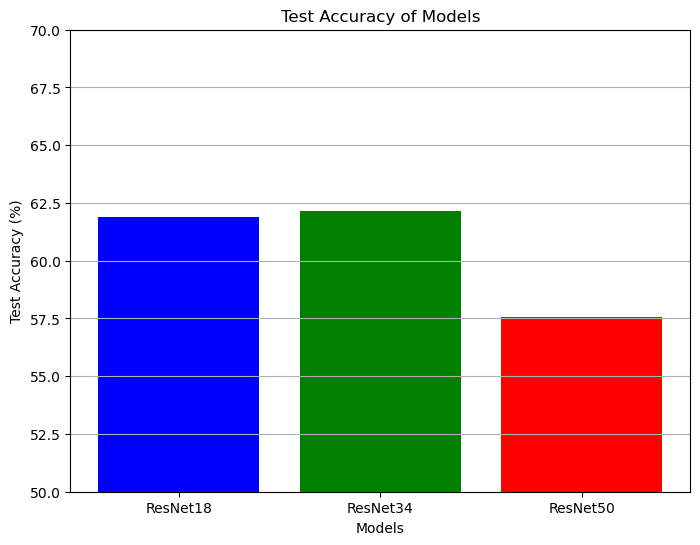

In [7]:
# Extracting test accuracy data for each model
test_accuracy_resnet18 = metrics_data['resnet18']['test_accuracy']
test_accuracy_resnet34 = metrics_data['resnet34']['test_accuracy']
test_accuracy_resnet50 = metrics_data['resnet50']['test_accuracy']

models = ['ResNet18', 'ResNet34', 'ResNet50']
test_accuracies = [test_accuracy_resnet18, test_accuracy_resnet34, test_accuracy_resnet50]

# Creating the bar chart for Test Accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, test_accuracies, color=['blue', 'green', 'red'])

plt.title('Test Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Test Accuracy (%)')
plt.ylim(50, 70)  # Setting the y-axis limits for better visual comparison
plt.grid(axis='y')
plt.show()

In [18]:
# Set positions of the bars on the X axis
barWidth = 0.25
r1 = np.arange(len(metrics_data.keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

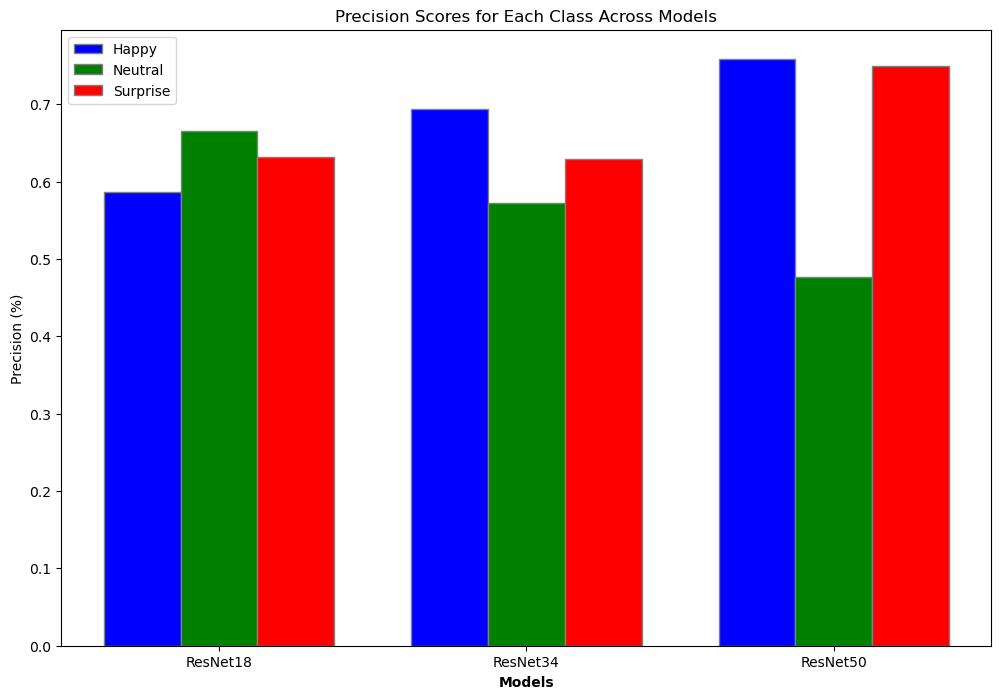

In [21]:
# Extracting precision scores for each class for each model
precision_happy = [metrics_data['resnet18']['test_report']['happy']['precision'], 
                   metrics_data['resnet34']['test_report']['happy']['precision'], 
                   metrics_data['resnet50']['test_report']['happy']['precision']]

precision_neutral = [metrics_data['resnet18']['test_report']['neutral']['precision'], 
                     metrics_data['resnet34']['test_report']['neutral']['precision'], 
                     metrics_data['resnet50']['test_report']['neutral']['precision']]

precision_surprise = [metrics_data['resnet18']['test_report']['surprise']['precision'], 
                      metrics_data['resnet34']['test_report']['surprise']['precision'], 
                      metrics_data['resnet50']['test_report']['surprise']['precision']]

# Creating the grouped bar chart for Precision Scores
plt.figure(figsize=(12, 8))
plt.bar(r1, precision_happy, color='blue', width=barWidth, edgecolor='grey', label='Happy')
plt.bar(r2, precision_neutral, color='green', width=barWidth, edgecolor='grey', label='Neutral')
plt.bar(r3, precision_surprise, color='red', width=barWidth, edgecolor='grey', label='Surprise')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Precision (%)')
plt.xticks([r + barWidth for r in range(len(precision_happy))], ['ResNet18', 'ResNet34', 'ResNet50'])
plt.title('Precision Scores for Each Class Across Models')

plt.legend()
plt.show()

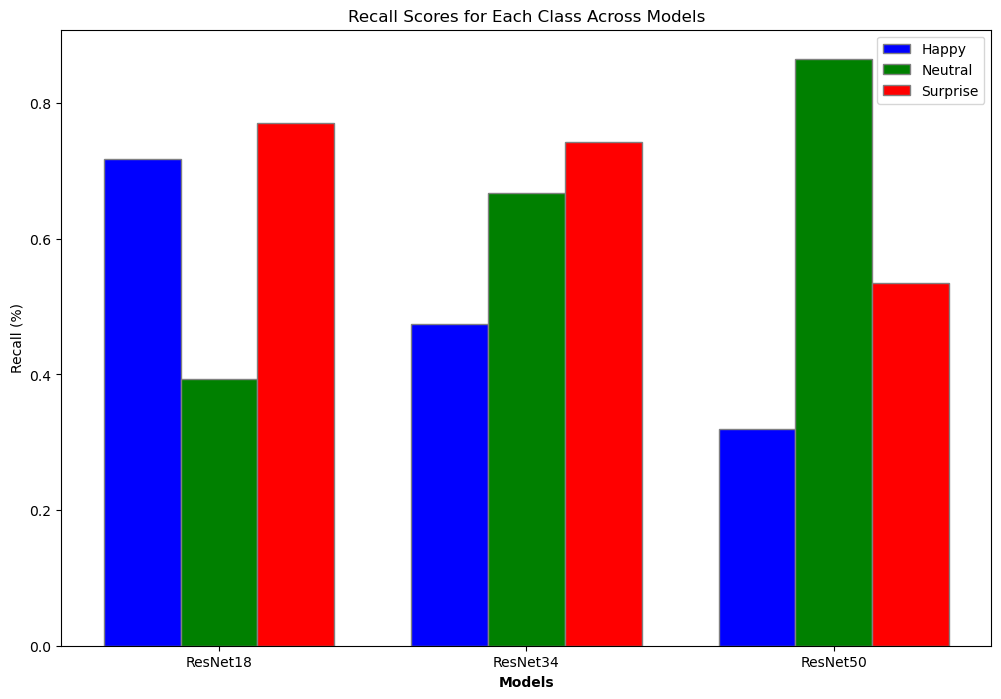

In [22]:
# Extracting recall scores for each class for each model
recall_happy = [metrics_data['resnet18']['test_report']['happy']['recall'], 
                metrics_data['resnet34']['test_report']['happy']['recall'], 
                metrics_data['resnet50']['test_report']['happy']['recall']]

recall_neutral = [metrics_data['resnet18']['test_report']['neutral']['recall'], 
                  metrics_data['resnet34']['test_report']['neutral']['recall'], 
                  metrics_data['resnet50']['test_report']['neutral']['recall']]

recall_surprise = [metrics_data['resnet18']['test_report']['surprise']['recall'], 
                   metrics_data['resnet34']['test_report']['surprise']['recall'], 
                   metrics_data['resnet50']['test_report']['surprise']['recall']]

# Creating the grouped bar chart for Recall Scores
plt.figure(figsize=(12, 8))
plt.bar(r1, recall_happy, color='blue', width=barWidth, edgecolor='grey', label='Happy')
plt.bar(r2, recall_neutral, color='green', width=barWidth, edgecolor='grey', label='Neutral')
plt.bar(r3, recall_surprise, color='red', width=barWidth, edgecolor='grey', label='Surprise')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Recall (%)')
plt.xticks([r + barWidth for r in range(len(recall_happy))], ['ResNet18', 'ResNet34', 'ResNet50'])
plt.title('Recall Scores for Each Class Across Models')

plt.legend()
plt.show()

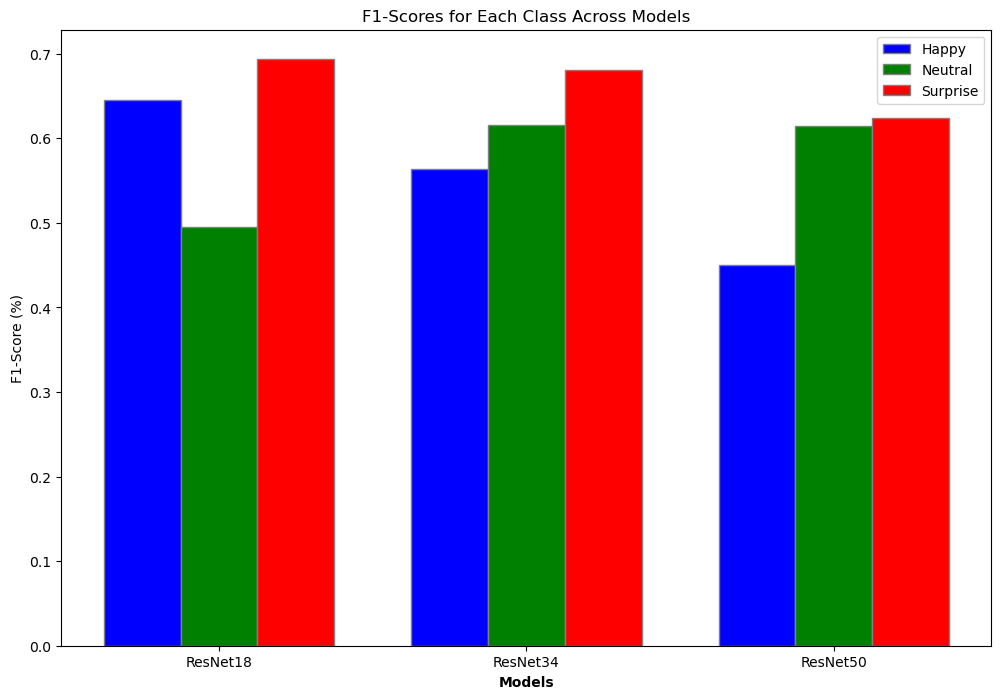

In [23]:
# Extracting F1-scores for each class for each model
f1_happy = [metrics_data['resnet18']['test_report']['happy']['f1-score'], 
            metrics_data['resnet34']['test_report']['happy']['f1-score'], 
            metrics_data['resnet50']['test_report']['happy']['f1-score']]

f1_neutral = [metrics_data['resnet18']['test_report']['neutral']['f1-score'], 
              metrics_data['resnet34']['test_report']['neutral']['f1-score'], 
              metrics_data['resnet50']['test_report']['neutral']['f1-score']]

f1_surprise = [metrics_data['resnet18']['test_report']['surprise']['f1-score'], 
               metrics_data['resnet34']['test_report']['surprise']['f1-score'], 
               metrics_data['resnet50']['test_report']['surprise']['f1-score']]

# Creating the grouped bar chart for F1-Scores
plt.figure(figsize=(12, 8))
plt.bar(r1, f1_happy, color='blue', width=barWidth, edgecolor='grey', label='Happy')
plt.bar(r2, f1_neutral, color='green', width=barWidth, edgecolor='grey', label='Neutral')
plt.bar(r3, f1_surprise, color='red', width=barWidth, edgecolor='grey', label='Surprise')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('F1-Score (%)')
plt.xticks([r + barWidth for r in range(len(f1_happy))], ['ResNet18', 'ResNet34', 'ResNet50'])
plt.title('F1-Scores for Each Class Across Models')

plt.legend()
plt.show()

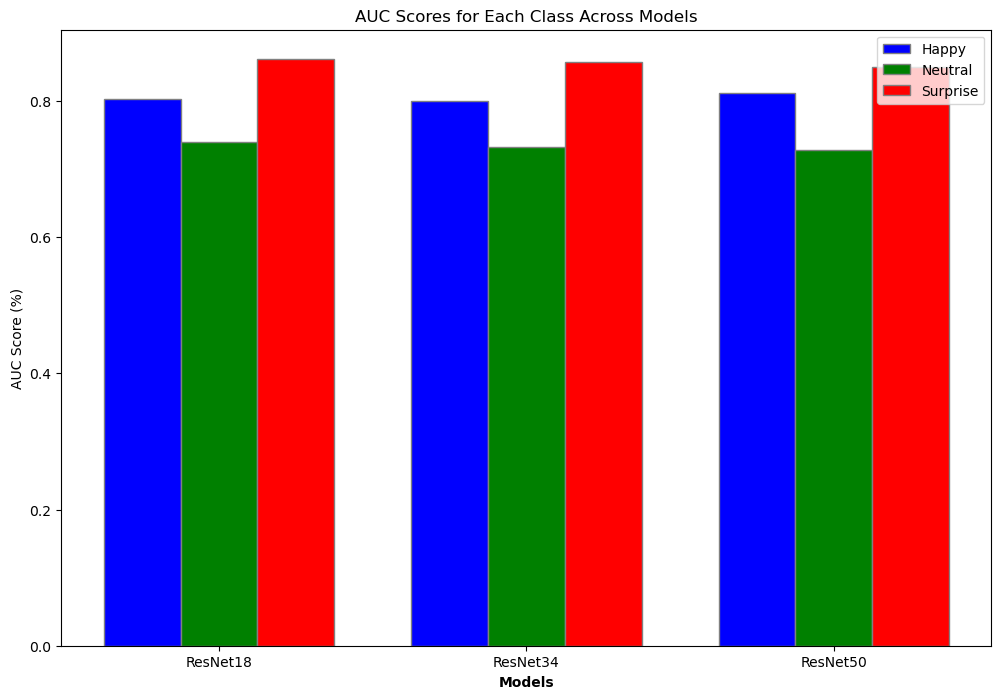

In [24]:
# Extracting AUC scores for each class for each model
auc_happy = [metrics_data['resnet18']['auc']['happy'], 
             metrics_data['resnet34']['auc']['happy'], 
             metrics_data['resnet50']['auc']['happy']]

auc_neutral = [metrics_data['resnet18']['auc']['neutral'], 
               metrics_data['resnet34']['auc']['neutral'], 
               metrics_data['resnet50']['auc']['neutral']]

auc_surprise = [metrics_data['resnet18']['auc']['surprise'], 
                metrics_data['resnet34']['auc']['surprise'], 
                metrics_data['resnet50']['auc']['surprise']]

# Creating the grouped bar chart for AUC Scores
plt.figure(figsize=(12, 8))
plt.bar(r1, auc_happy, color='blue', width=barWidth, edgecolor='grey', label='Happy')
plt.bar(r2, auc_neutral, color='green', width=barWidth, edgecolor='grey', label='Neutral')
plt.bar(r3, auc_surprise, color='red', width=barWidth, edgecolor='grey', label='Surprise')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('AUC Score (%)')
plt.xticks([r + barWidth for r in range(len(auc_happy))], ['ResNet18', 'ResNet34', 'ResNet50'])
plt.title('AUC Scores for Each Class Across Models')

plt.legend()
plt.show()